In [2]:
library("quantmod")
library("repr")
library("tseries")
#Change plot size.
options(repr.plot.width=14, repr.plot.height=10)

install.packages("devtools")
require(devtools)
install_github("braverock/FinancialInstrument")
install_github("joshuaulrich/xts")
install_github("braverock/blotter")
install_github("braverock/quantstrat")
install_github("braverock/PerformanceAnalytics")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [3]:
closingdata <- read.csv(file="BIST.csv", header=TRUE, sep=",")
date <- strptime(closingdata$Date, format = "%d/%m/%Y")
closingdata <- closingdata[,-1]
xclosingdata <- xts(closingdata,date)

In [21]:
price1 <- subset(xclosingdata,select=c("AKBNK"))
price2 <- subset(xclosingdata,select=c("KCHOL"))

return1 <- dailyReturn(log(price1["2008/2017"]))
return2 <- dailyReturn(log(price2["2008/2017"]))

# Carry out linear regression on the two price series
comb <- lm(return1 ~ return2)
adfresult <- adf.test(coredata(comb$residuals), k=2)

Relative <- price1/price2

roll <- rollmean(Relative,100,align="right",fill = 0)
hedgeRatio <- comb$coefficients[2] / (tail(price1,1)/tail(price2, 1))
b <- scale(comb$residuals, center = TRUE, scale = TRUE)
maxmean <- mean(rollmax(b[which(b>0)],300))
minmean <- mean(rollapply(b[which(b<0)],50,min))

zEntry <- maxmean * 0.4
zProfit <- maxmean * 0.1
zStop <- maxmean 

nzEntry <- minmean * 0.4
nzProfit <-  minmean * 0.1
nzStop <- minmean

zScore <- tail(b,1)

Warning message in adf.test(coredata(comb$residuals), k = 2):
“p-value smaller than printed p-value”

In [22]:
maxmean
mean(unique(rollmax(b,50)))
unique(rollmax(b,50))

[1] 3.454551

[1] 1.901684

[1] 2.5884472 3.0512933 2.4788162 2.3142305 4.6486111 4.7905621 8.2472339
  [8] 4.6290712 6.1991320 5.6186028 4.8359103 4.5649170 4.2056766 2.8370752
 [15] 2.4548364 2.6832631 3.8909035 1.8143539 2.2969824 1.1316018 1.3133673
 [22] 2.5297550 2.6049683 1.5909754 0.8735225 0.7994748 1.3586045 1.9813066
 [29] 1.1619345 1.2225457 1.1289129 1.1411461 1.5179099 3.2224433 1.8358075
 [36] 1.5810410 1.2886426 1.7234418 2.1795949 1.9019163 1.6592855 1.3142957
 [43] 3.1850780 1.1929258 1.1190403 0.9184149 0.8979231 0.7704294 0.7328105
 [50] 1.2735641 1.4272914 1.2557650 0.6760181 0.6804092 0.7312971 0.7413814
 [57] 0.9374450 1.0091428 1.1826815 1.5937654 1.8049341 1.9262417 2.2310528
 [64] 2.3673218 1.7057698 1.8782637 1.8452357 1.5494514 1.8488084 1.9364088
 [71] 2.2383430 1.1418039 1.1029105 1.3417189 1.4290713 1.5955278 1.5951828
 [78] 1.5326517 1.7490127 1.1213566 1.2725358 1.1843697 1.2042705 1.5638059
 [85] 1.7184091 2.3309811 1.2867818 1.2960241 1.3662229 1.0276015 1.6807304
 [92] 1.1624396 1.3048410 0.7360280 1.5184729 1.7276309 1.5503580 0.8583119
 [99] 0.7450059 1.0827616 0.7844186 1.0909393

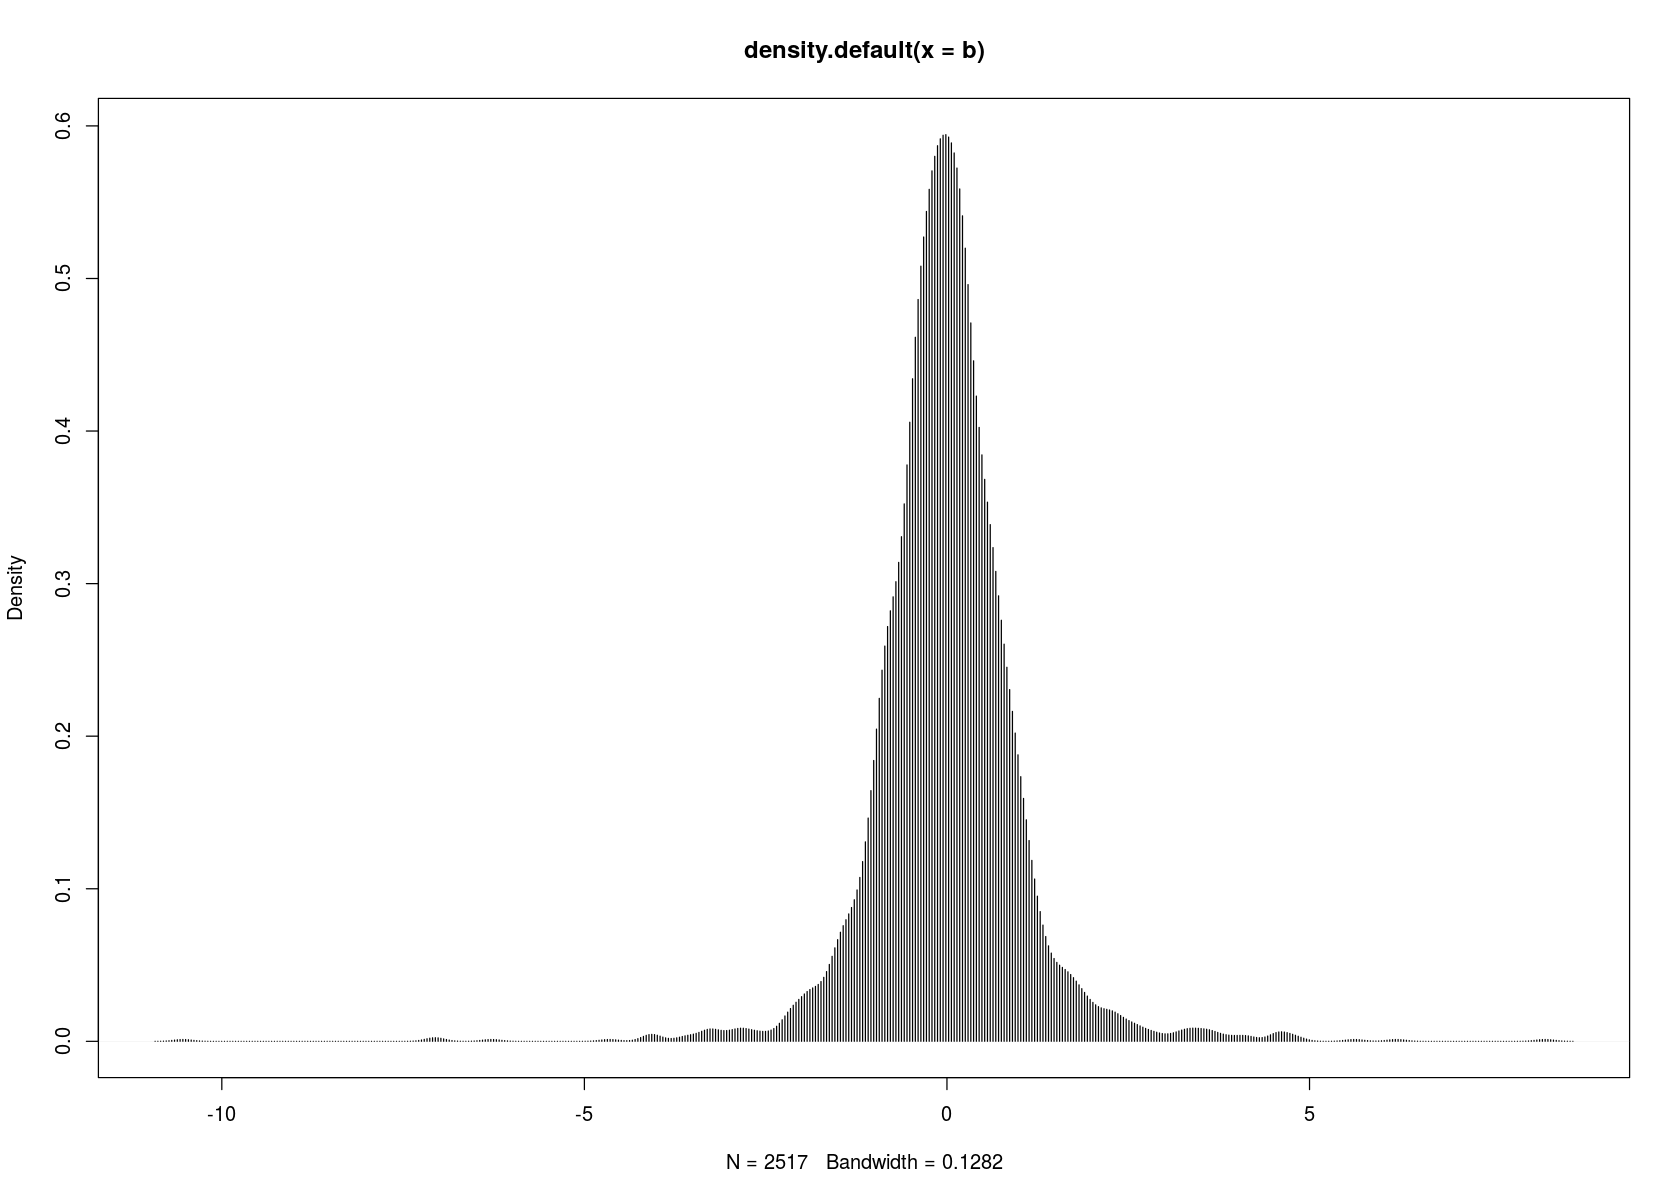

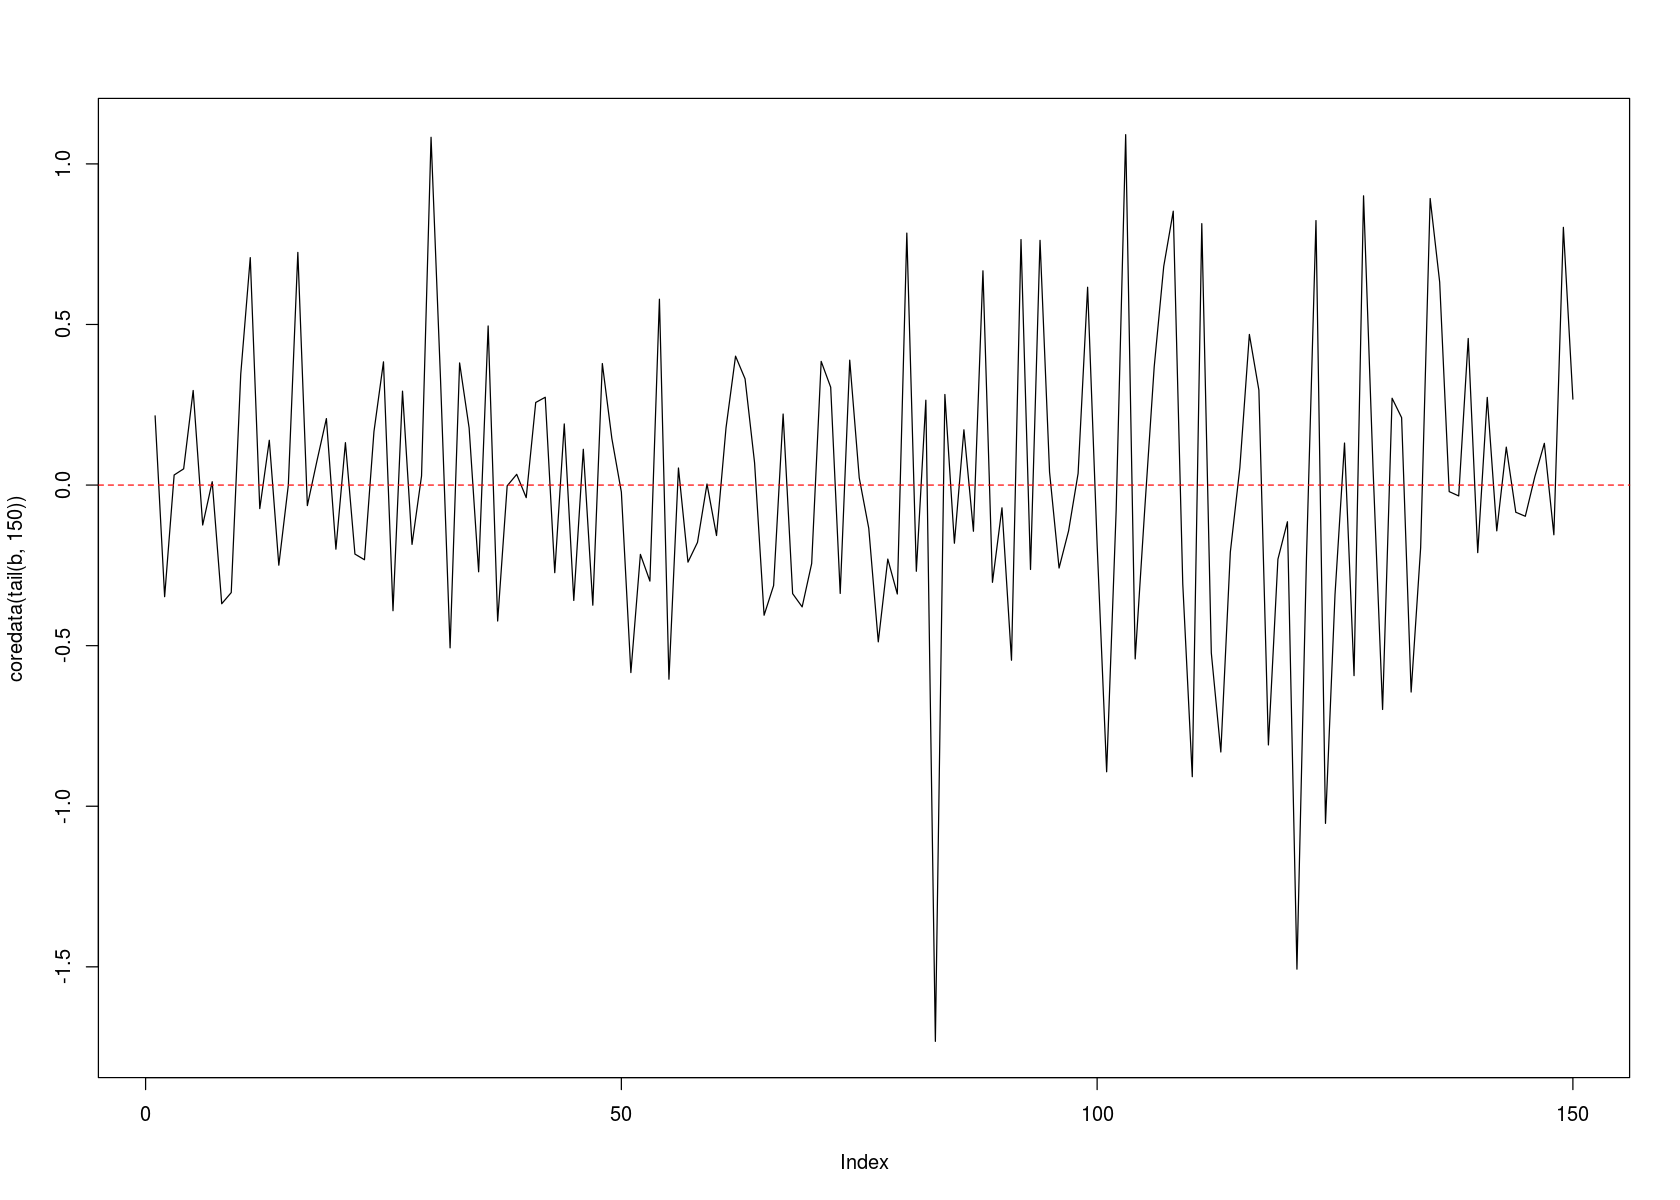

In [23]:
plot(density(b),type="h")
plot(coredata(tail(b,150)),type="l")
abline(h = mean(b) , col = "red", lty = 2)
abline(h = zEntry , col = "seagreen", lty = 2)
abline(h = nzEntry , col = "seagreen", lty = 2)

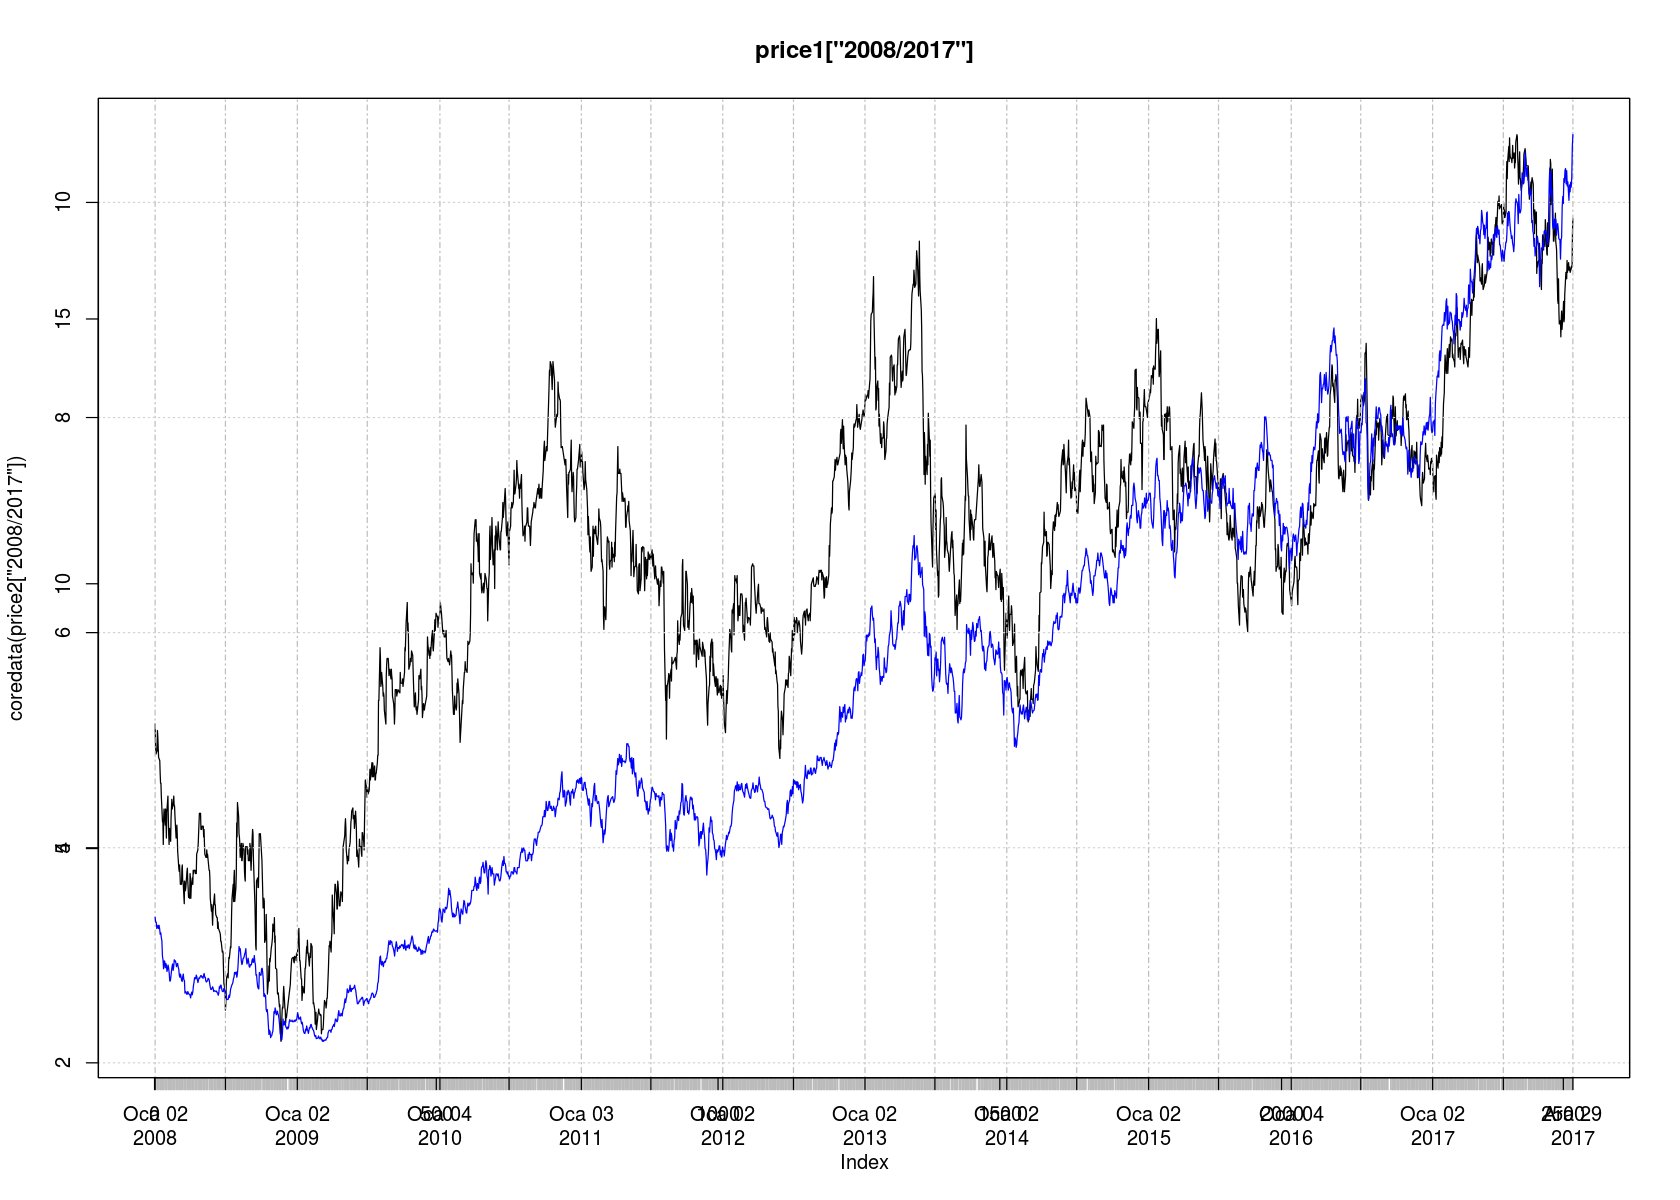

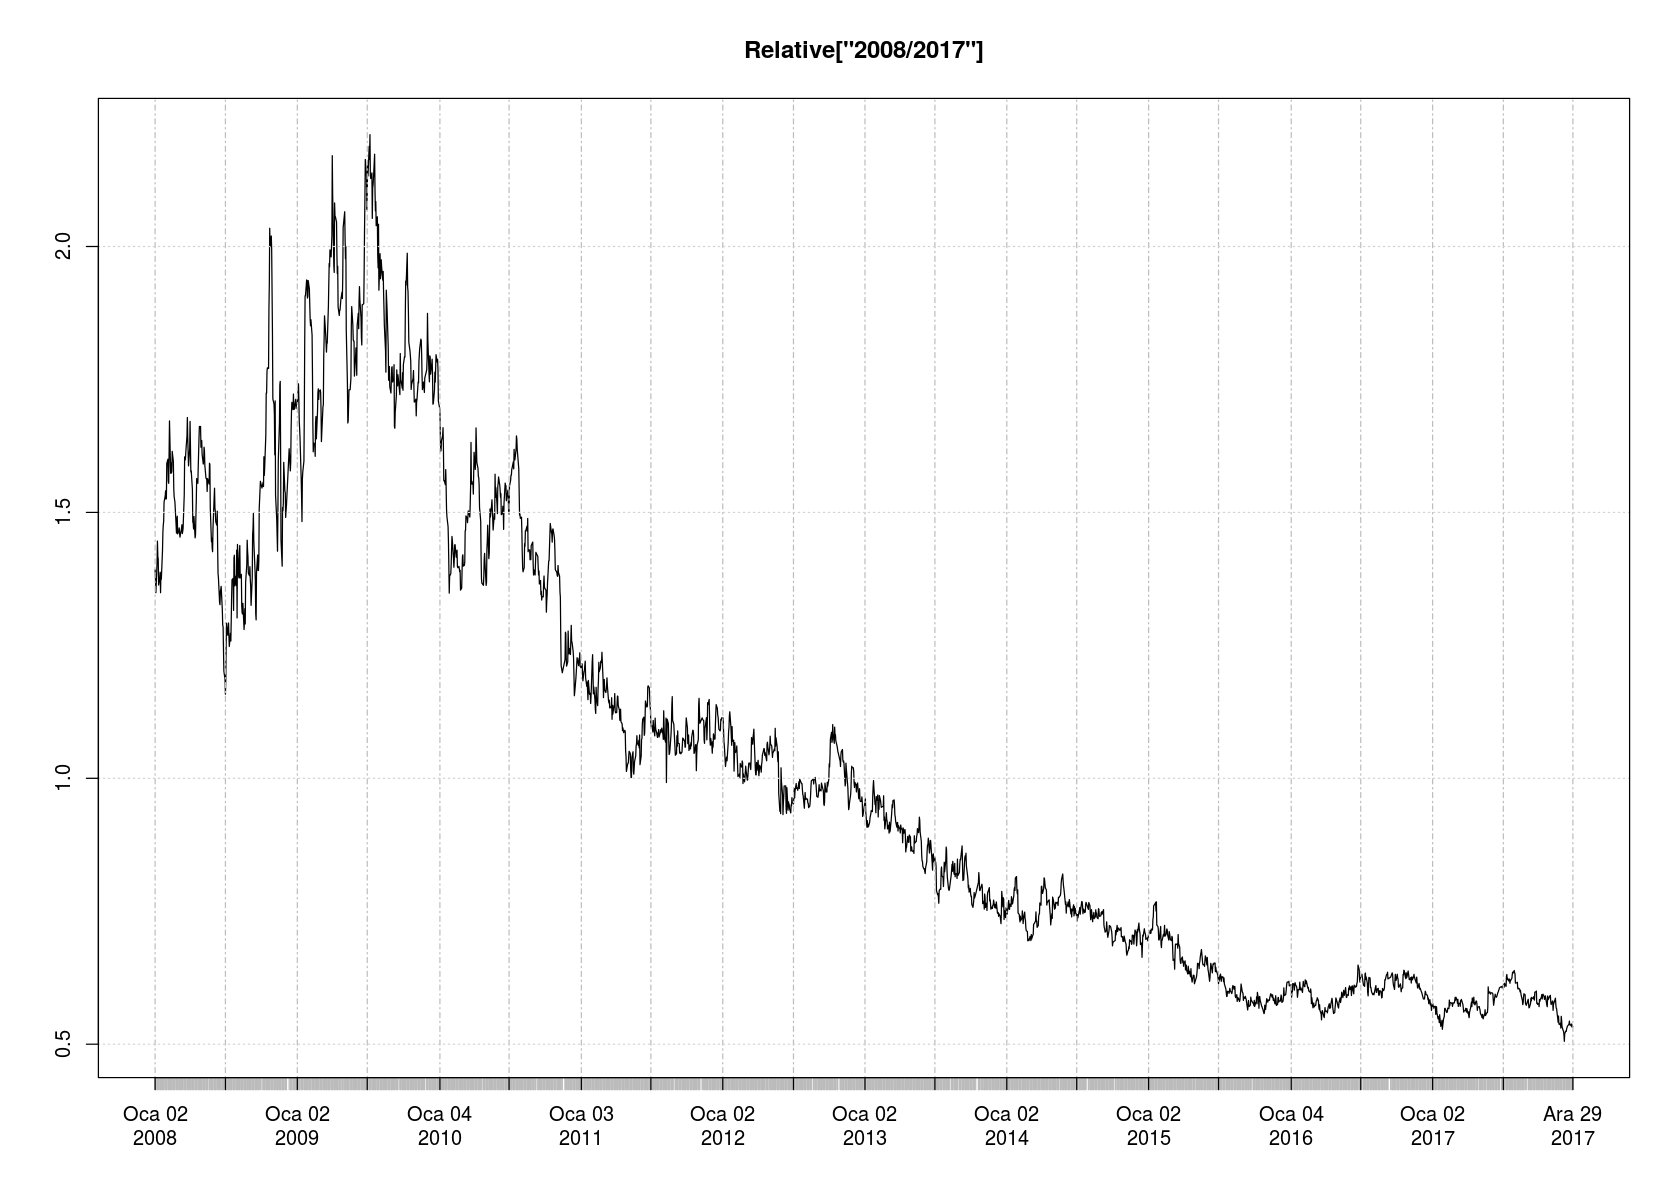

In [27]:
plot(price1["2008/2017"])
par(new=T)
plot(coredata(price2["2008/2017"]),type="l",col="blue")

plot(Relative["2008/2017"])

In [20]:
# Carry out linear regression on the two price series
comb1 = lm(dailyReturn(log(fiyat[,1]))~dailyReturn(log(fiyat[,2]))
comb2 = lm(dailyReturn(logfiyat[,2]))~dailyReturn(log(fiyat[,1])))
# Performs the ADF test using a single lag order. 
# Picks the one with lower adf stat.
adfresult1 <- adf.test(comb1$residuals, k=2)
adfresult2 <- adf.test(comb2$residuals, k=2)
# Check both sides to obtain better stats.
if (adfresult1$statistic < adfresult2$statistic){
comb = comb1
adfresult = adfresult1
} else{
comb = comb2
adfresult = adfresult2
hold = fiyat[,1]
fiyat[,1] = fiyat[,2]
fiyat[,2] = hold
hold = stock[1]
stock[1] = stock[2]
stock[2] = hold
hold = ticker1
ticker1 = ticker2
ticker2 = hold
}

date <- as.Date(hisse$Date, "%d/%m/%Y")
startDate <- as.Date("2016", "%Y")
today <- as.Date(Sys.Date(), "%m/%d/%Y")

Relative <- fiyat[,1]/fiyat[,2]
Relative[is.infinite(Relative)] <- 0
Relative[is.nan(Relative)] <- 0
Relative[is.na(Relative)] <- 0

roll <- rollmean(Relative,100,align="right",fill = 0)
hedgeRatio <- comb$coefficients[2] / (tail(fiyat[,1],1)/tail(fiyat[,2],1))
b <- scale(comb$residuals, center = TRUE, scale = TRUE)
maxmean <- mean(rollmax(b[which(b>0)],100))
minmean <- mean(rollapply(b[which(b<0)],100,min))

zEntry <- maxmean * 0.8
zProfit <- maxmean * 0.5
zStop <- maxmean 

nzEntry <- minmean * 0.8
nzProfit <-  minmean * 0.8
nzStop <- minmean

zScore <- tail(b,1)

# Plot closing prices
plot(date,fiyat[,1], type="l",xlim=c(startDate,today),ylim=range(tail(fiyat[,1],300)), xlab="Date", ylab="Prices", col="blue")
legend("topleft", c(paste(ticker1,"LHS"), paste(ticker2,"RHS")), lty=c(1, 1), col=c("blue", "red"), bg="white" )  
par(new=T)
plot(date,fiyat[,2], type="l",xlim=c(startDate,today),ylim=range(tail(fiyat[,2],300)), axes=F, xlab="", ylab="", col="red")
mtext(paste("Closing Prices",ticker1,ticker2))
axis(side=4)


# Plot relative price
plot(date,Relative,xlim=c(startDate,today),ylim=range(tail(Relative,300)),xlab="Date", type="l", ylab="",col="gray25")
par(new=T)
plot(date,roll, type="l",xlim=c(startDate,today),ylim=range(tail(Relative,300)), axes=F, xlab="", ylab="", col="red")
legend("bottomleft", c("Relative Performance", "Rolling Mean"), lty=c(1,1), col=c("gray25", "red"), bg="white")  	
mtext(paste("Relative Performance:",ticker1,"/",ticker2))

# Plot spread
plot(date,b, type = "l",xlim=c(startDate,today), ylim=range(tail(b,300)), xlab="Date", ylab="",col="gray60")
abline(h = mean(b) , col = "red", lty = 2)
abline(h = zEntry , col = "seagreen", lty = 2)
abline(h = nzEntry , col = "seagreen", lty = 2)
legend("bottomleft", c("Entry Level", "Historical Mean", "Spread"), lty=c(2,2,1), col=c("seagreen", "red", "gray40"), bg="white" )  		
mtext(paste(zScore/zEntry,"Z Score of Spread"))

ERROR: Error in parse(text = x, srcfile = src): <text>:3:1: unexpected symbol
2: comb1 = lm(dailyReturn(log(fiyat[,1]))~dailyReturn(log(fiyat[,2]))
3: comb2
   ^


## Forecasting

### Seasonality Analysis

In [47]:
x01 <- stl(ts(as.vector(XU100_0108), frequency = 20),"periodic")
x16 <- stl(ts(as.vector(XU100_0816), frequency = 20),"periodic")
tum01 <- stl(ts(as.vector(XUTUM_0108), frequency = 20),"periodic")
tum16 <- stl(ts(as.vector(XUTUM_0108), frequency = 20),"periodic")

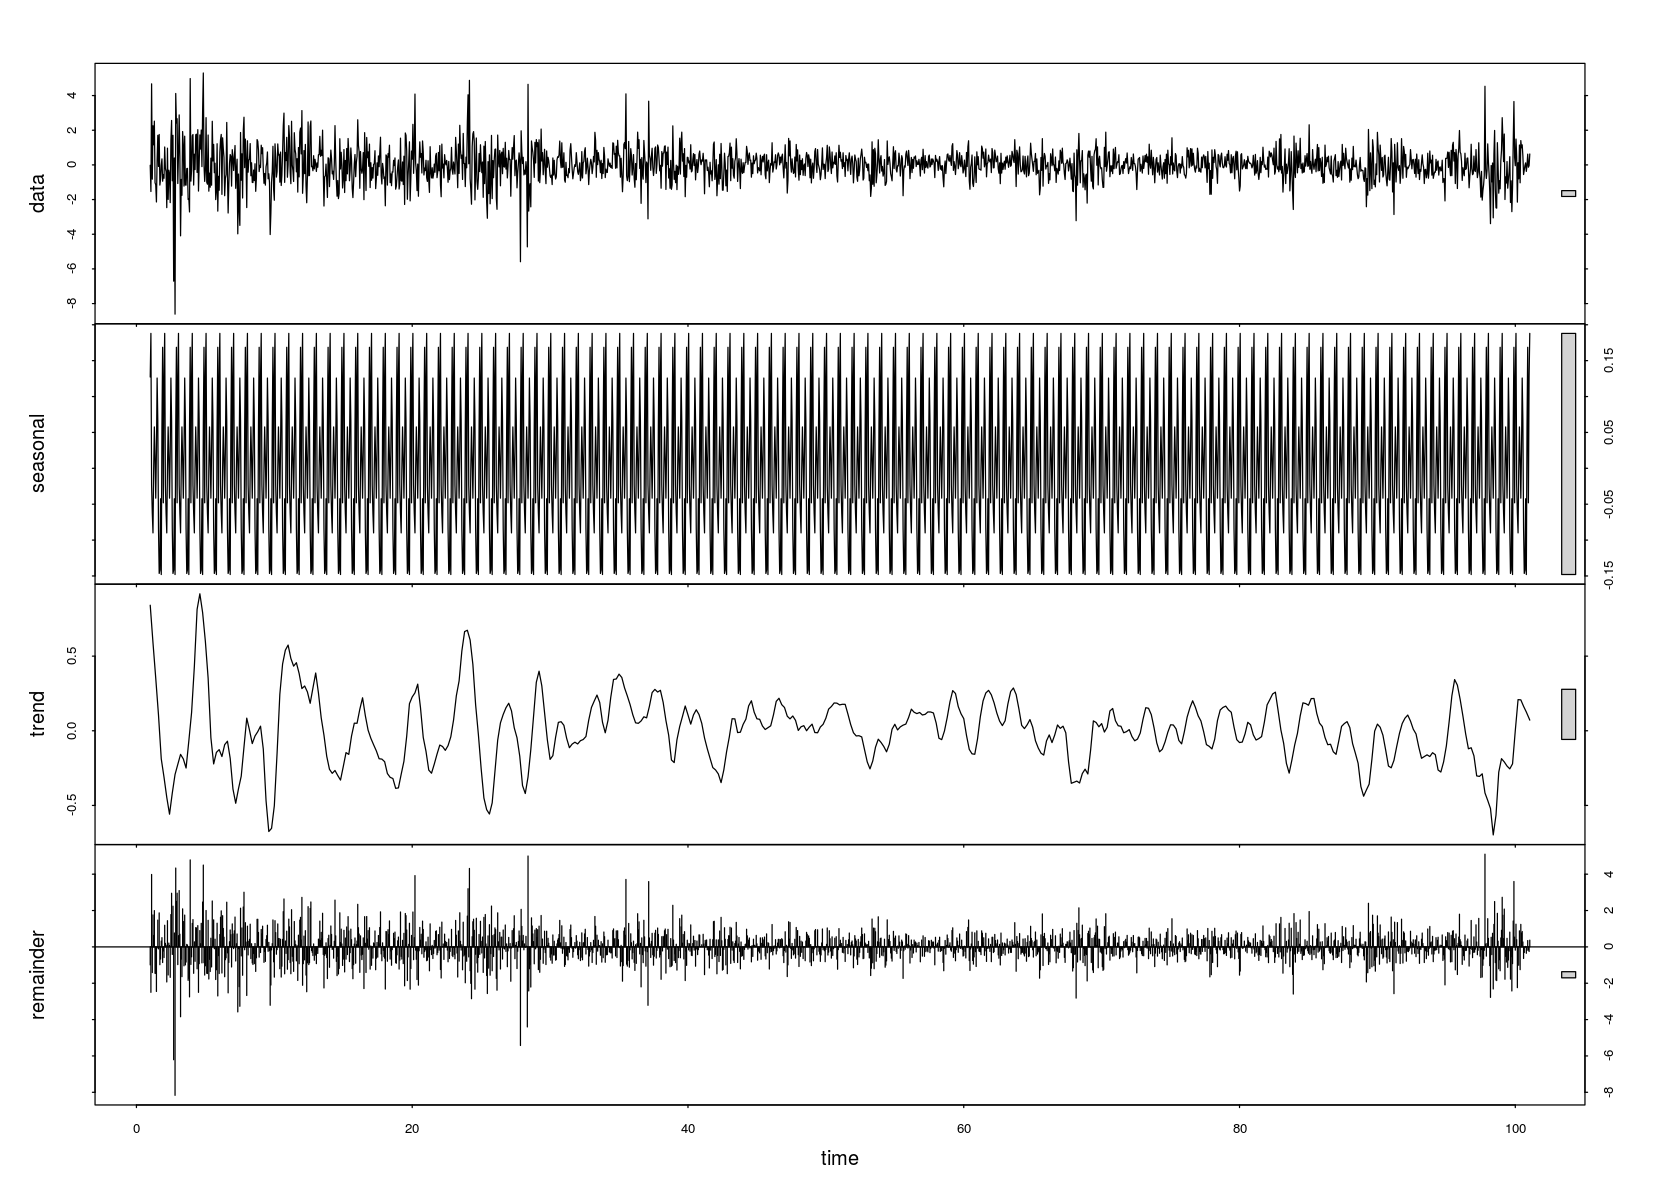

In [48]:
plot(x01)

In [52]:
arima <- auto.arima(XU100_0108)
arima

Series: XU100_0108 
ARIMA(3,0,2) with zero mean 

Coefficients:
         ar1     ar2     ar3      ma1      ma2
      0.2377  0.1800  -0.052  -0.2371  -0.1470
s.e.  0.4197  0.2303   0.024   0.4202   0.2296

sigma^2 estimated as 0.9989:  log likelihood=-2837.08
AIC=5686.16   AICc=5686.2   BIC=5719.77


Forecast method: ARIMA(3,0,2) with zero mean

Model Information:
Series: XU100_0108 
ARIMA(3,0,2) with zero mean 

Coefficients:
         ar1     ar2     ar3      ma1      ma2
      0.2377  0.1800  -0.052  -0.2371  -0.1470
s.e.  0.4197  0.2303   0.024   0.4202   0.2296

sigma^2 estimated as 0.9989:  log likelihood=-2837.08
AIC=5686.16   AICc=5686.2   BIC=5719.77

Error measures:
                        ME      RMSE      MAE      MPE     MAPE      MASE
Training set -1.393762e-05 0.9981834 0.704669 105.6524 117.5336 0.9995967
                     ACF1
Training set 0.0003005424

Forecasts:
        Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
7207201   2.378790e-03 -1.278445 1.283203 -1.956472 1.961230
7210801   1.918403e-02 -1.261640 1.300008 -1.939667 1.978036
7214401  -2.772255e-02 -1.309248 1.253803 -1.987647 1.932202
7218001  -3.261417e-03 -1.286026 1.279503 -1.965081 1.958558
7221601  -6.762053e-03 -1.289540 1.276016 -1.968601 1.955077
7225201  -7.534648e-04 -1.283605 1.2820

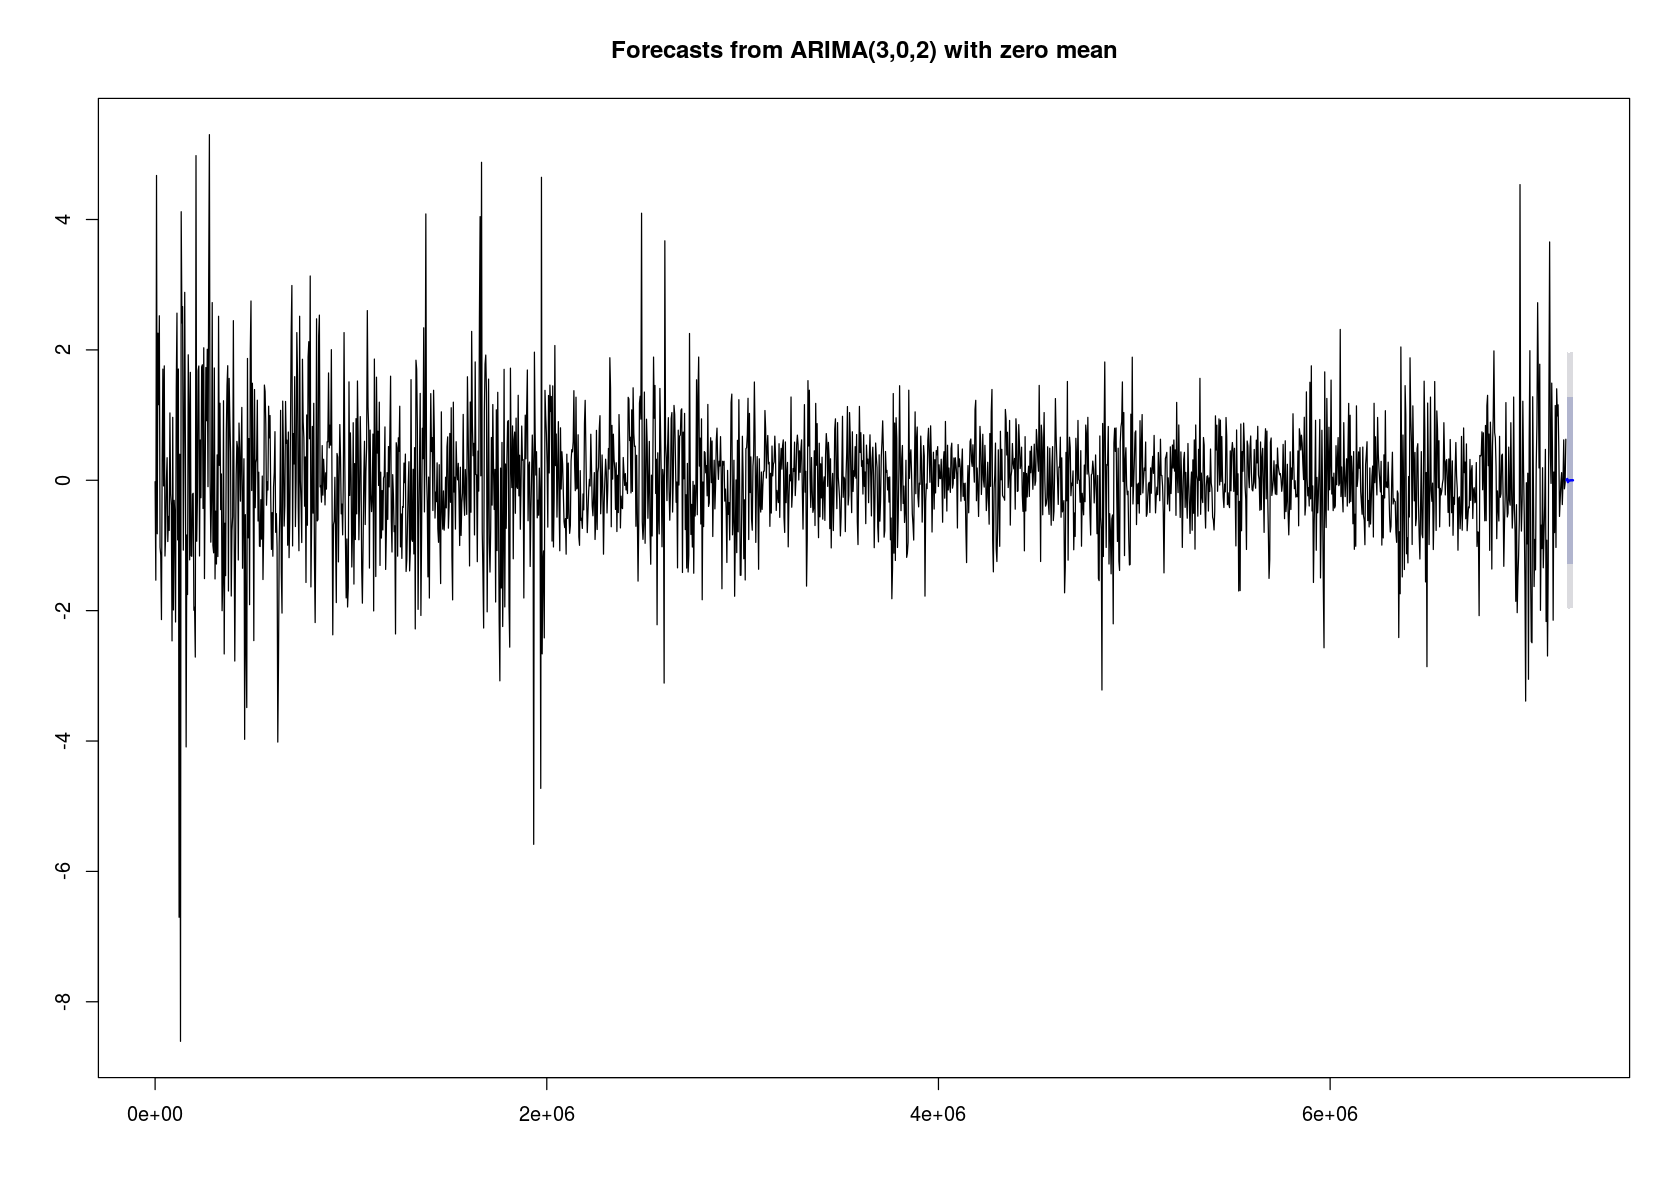

In [53]:
fcast <- forecast(arima)
plot(fcast)
summary(fcast)

[1] 2002

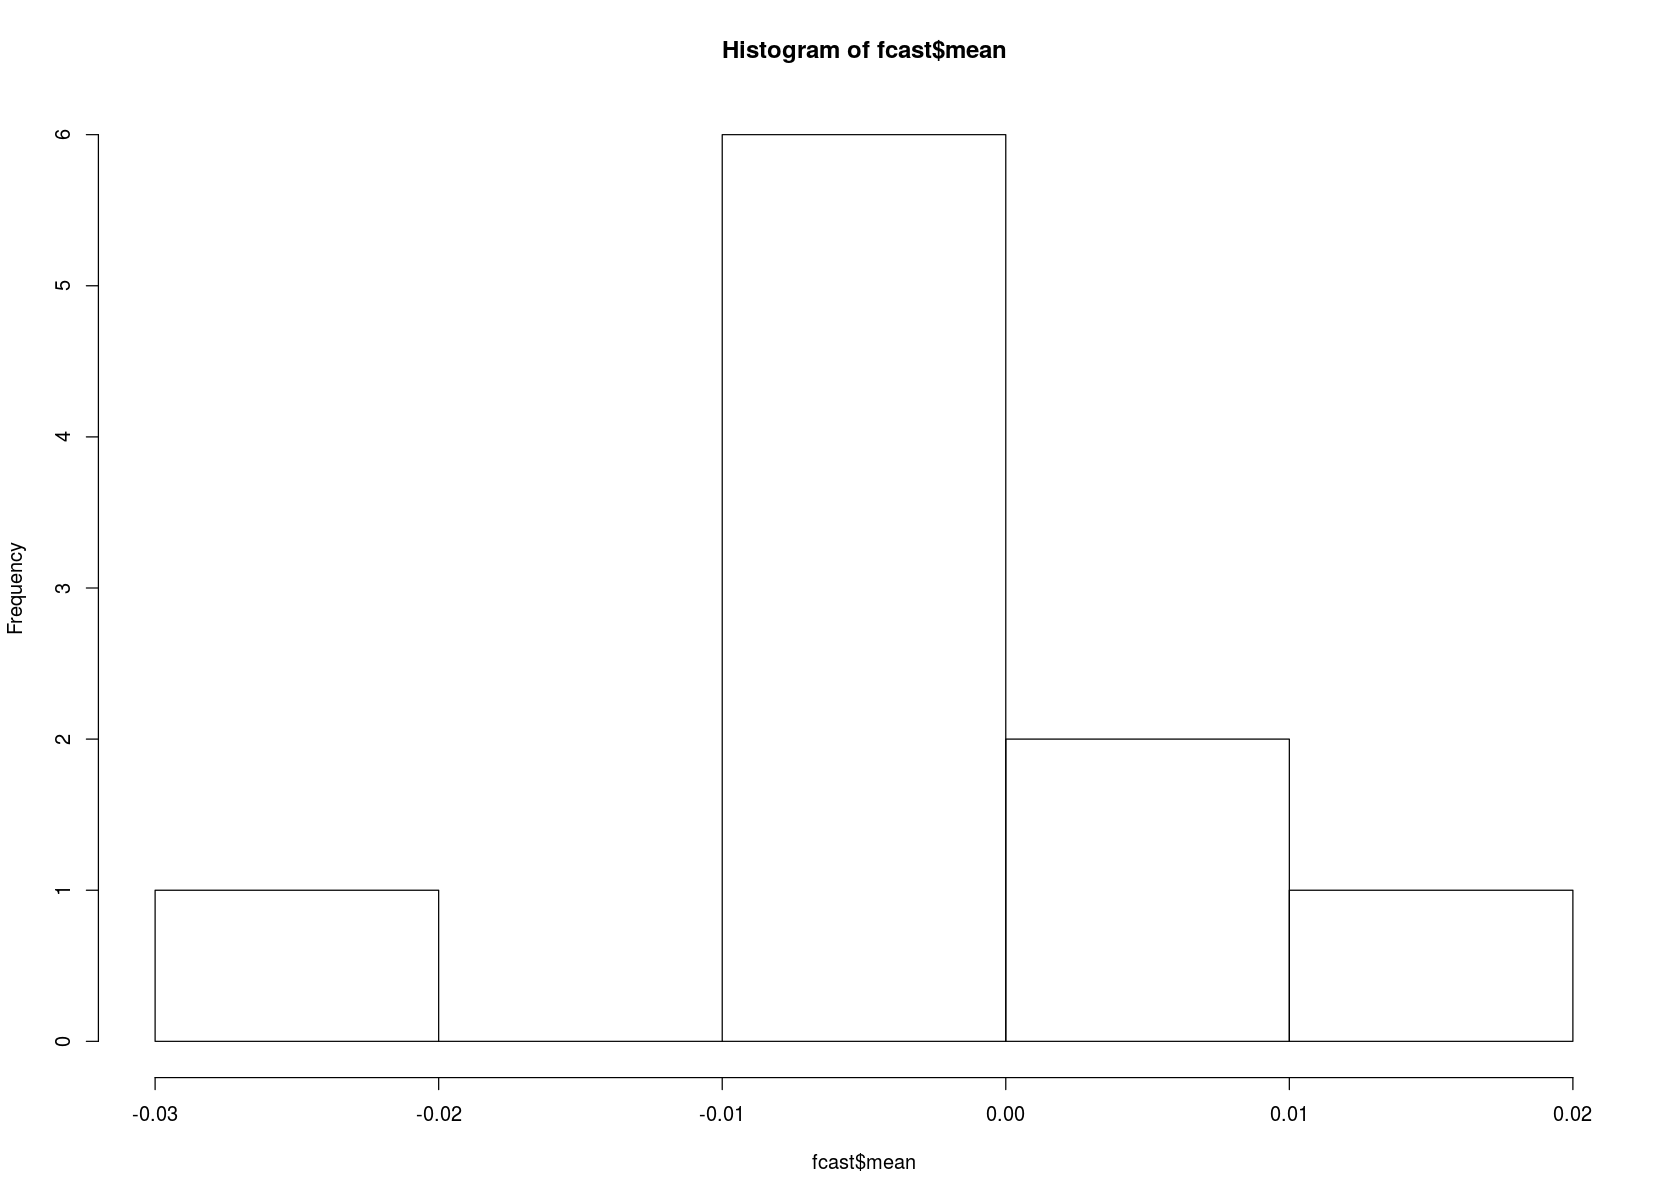

In [54]:
length(XU100_0108)
hist(fcast$mean)